# Imports e carregamento de base

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sn
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
base = pd.read_csv("/content/Credito.csv", sep=';', encoding='latin-1')
base

,CHEQUEESPECIAL,USO_CREDITO,HISTORICO_CREDITO,PROPOSITO,BALANCO_ATUAL,BALANCO_MEDIO_CREDITO,EMPREGADO,LOCAL,ESTADOCIVIL,OUTRASFUNCOES,RESIDENCIADESDE,TIPOSBENS,IDADE,OUTROSPLANOSPGTO,RESIDENCIA,CREDITOSEXISTENTES,EMPREGO,DEPENDENTES,TRABAESTRANGEIRO,CLASSE
0,<0,6,crítica / outros de crédito existente,Computador/TV,1169,nenhuma economia conhecida,>=7,4,masculino solteiro,nenhum,4,bens imóveis,67,nenhum,própria,2,especializado,1,sim,bom
1,0<=X<200,48,existente e pago,Computador/TV,5951,<100,1<=X<4,2,fem div/cas,nenhum,2,bens imóveis,22,nenhum,própria,1,especializado,1,sim,ruim
2,sem cheque,12,crítica / outros de crédito existente,educação,2096,<100,4<=X<7,2,masculino solteiro,nenhum,3,bens imóveis,49,nenhum,própria,1,não especializado,2,sim,bom
3,<0,42,existente e pago,mobilia/equipamento,7882,<100,4<=X<7,2,masculino solteiro,fiador,4,seguro de vida,45,nenhum,gratuitamente,1,especializado,2,sim,bom
4,<0,24,atrasos anteriores,carro novo,4870,<100,1<=X<4,3,masculino solteiro,nenhum,4,nenhuma conhecida,53,nenhum,gratuitamente,2,especializado,2,sim,ruim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,sem cheque,12,existente e pago,mobilia/equipamento,1736,<100,4<=X<7,3,fem div/cas,nenhum,4,bens imóveis,31,nenhum,própria,1,não especializado,1,sim,bom
996,<0,30,existente e pago,carro usado,3857,<100,1<=X<4,4,masculino div/sep,nenhum,4,seguro de vida,40,nenhum,própria,1,alta qualificação/autonomo/Gerente,1,sim,bom
997,sem cheque,12,existente e pago,Computador/TV,804,<100,>=7,4,masculino solteiro,nenhum,4,carro,38,nenhum,própria,1,especializado,1,sim,bom
998,<0,45,existente e pago,Computador/TV,1845,<100,1<=X<4,4,masculino solteiro,nenhum,4,nenhuma conhecida,23,nenhum,gratuitamente,1,especializado,1,sim,ruim


# Exploração dos Dados

In [3]:
#Informação geral do dataframe
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CHEQUEESPECIAL         1000 non-null   object
 1   USO_CREDITO            1000 non-null   int64 
 2   HISTORICO_CREDITO      1000 non-null   object
 3   PROPOSITO              1000 non-null   object
 4   BALANCO_ATUAL          1000 non-null   int64 
 5   BALANCO_MEDIO_CREDITO  1000 non-null   object
 6   EMPREGADO              1000 non-null   object
 7   LOCAL                  1000 non-null   int64 
 8   ESTADOCIVIL            1000 non-null   object
 9   OUTRASFUNCOES          1000 non-null   object
 10  RESIDENCIADESDE        1000 non-null   int64 
 11  TIPOSBENS              1000 non-null   object
 12  IDADE                  1000 non-null   int64 
 13  OUTROSPLANOSPGTO       1000 non-null   object
 14  RESIDENCIA             1000 non-null   object
 15  CREDITOSEXISTENTES    

In [4]:
#Verificação dos nomes das colunas
base.columns

Index(['CHEQUEESPECIAL', 'USO_CREDITO', 'HISTORICO_CREDITO', 'PROPOSITO',
       'BALANCO_ATUAL', 'BALANCO_MEDIO_CREDITO', 'EMPREGADO', 'LOCAL',
       'ESTADOCIVIL', 'OUTRASFUNCOES', 'RESIDENCIADESDE', 'TIPOSBENS', 'IDADE',
       'OUTROSPLANOSPGTO', 'RESIDENCIA', 'CREDITOSEXISTENTES', 'EMPREGO',
       'DEPENDENTES', 'TRABAESTRANGEIRO', 'CLASSE'],
      dtype='object')

In [5]:
# Visualização numérica das distribuições de cada classe.
values = base['CLASSE'].value_counts()
values

bom     700
ruim    300
Name: CLASSE, dtype: int64

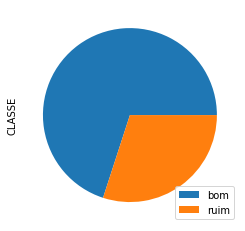

In [6]:
# Contagem da quantidade de classes (values).
ax = values.plot(kind='pie', labels=['','',''])
ax.legend(loc=4, labels=values.index)

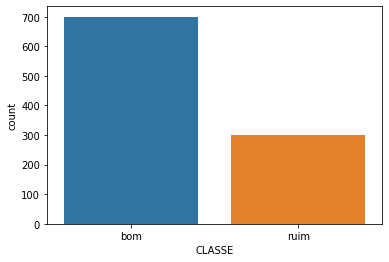

In [7]:
sns.countplot(x='CLASSE', data = base)

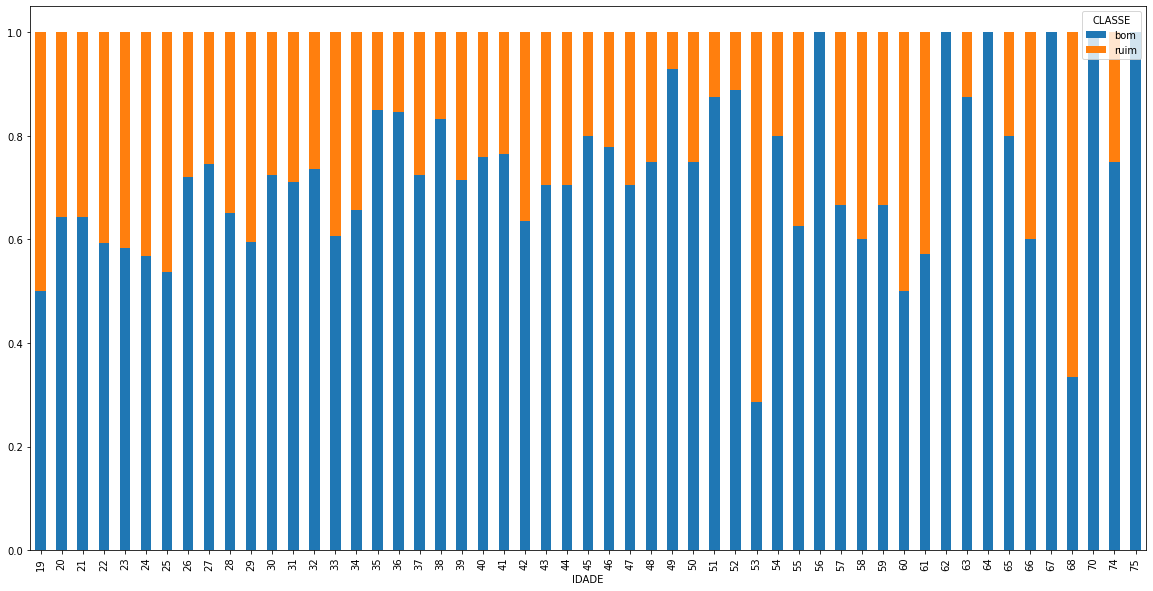

In [8]:
# A idade não influencia no crédito
props = base.groupby("IDADE")['CLASSE'].value_counts(normalize=True).unstack(level=-1)
props.plot(kind='bar', stacked='True', figsize=(20,10))

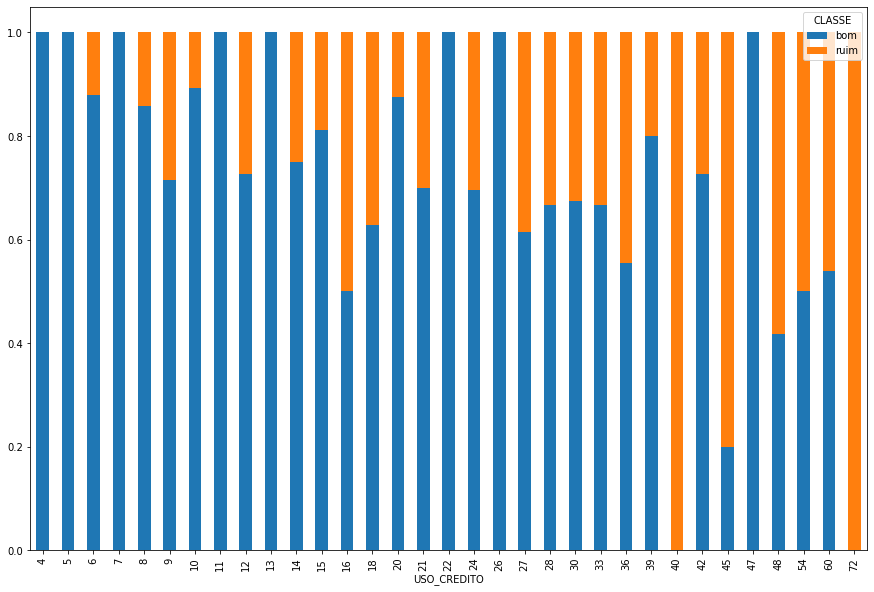

In [9]:
# Quanto mais meses com crédito mostra uma certa tendência de piora de cliente
props = base.groupby("USO_CREDITO")['CLASSE'].value_counts(normalize=True).unstack(level=-1)
props.plot(kind='bar', stacked='True', figsize=(15,10))

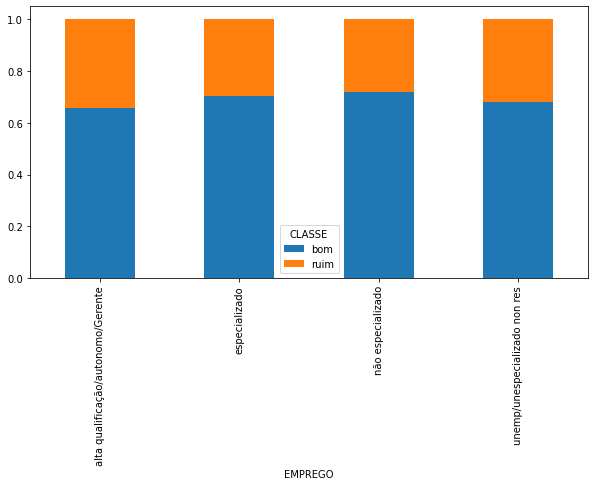

In [10]:
# O emprego também tem pouca relevância
props = base.groupby("EMPREGO")['CLASSE'].value_counts(normalize=True).unstack(level=-1)
props.plot(kind='bar', stacked='True', figsize=(10,5))

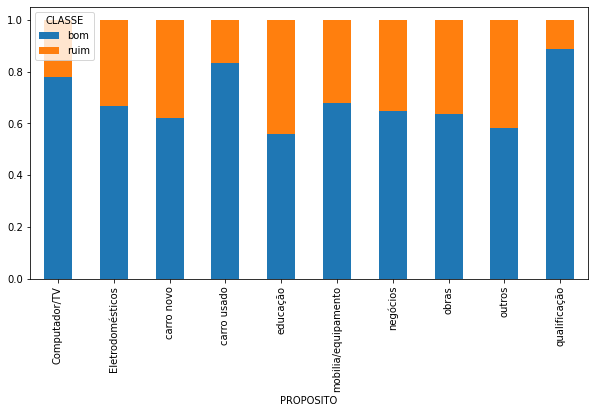

In [11]:
# O propósito já tem uma relação maior, se o próposito for qualificação, o crédito é bom.
props = base.groupby("PROPOSITO")['CLASSE'].value_counts(normalize=True).unstack(level=-1)
props.plot(kind='bar', stacked='True', figsize=(10,5))

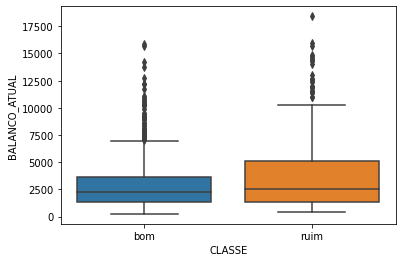

In [12]:
#O balanço atual, influencia na classe do cliente
ax = sns.boxplot(x='CLASSE', y = 'BALANCO_ATUAL', data = base)

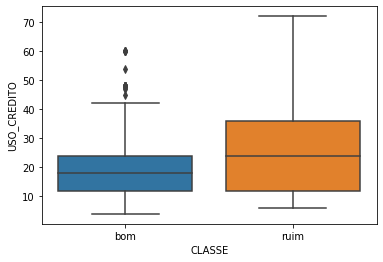

In [13]:
#O uso de credito tem influencia significativa
ax = sns.boxplot(x='CLASSE', y = 'USO_CREDITO', data = base)

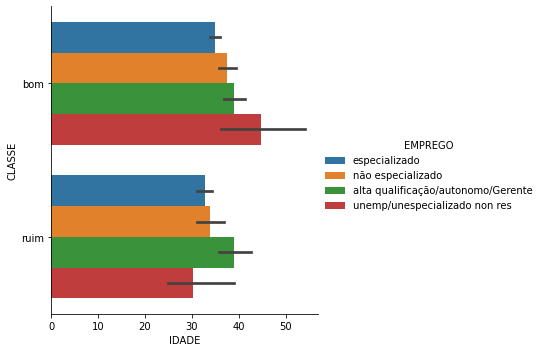

In [14]:
# Relação entre idade, crédito e emprego gera algumas informações interessantes.

sns.catplot(x="IDADE", y="CLASSE", hue="EMPREGO", kind="bar", data=base);

## Analise de dados univariados

### Medidadas de localidade

#### Categóricos

In [15]:
# Moda 
# Representa o valor mais frequente dado o conjunto de valores categóricos
base.mode()

,CHEQUEESPECIAL,USO_CREDITO,HISTORICO_CREDITO,PROPOSITO,BALANCO_ATUAL,BALANCO_MEDIO_CREDITO,EMPREGADO,LOCAL,ESTADOCIVIL,OUTRASFUNCOES,RESIDENCIADESDE,TIPOSBENS,IDADE,OUTROSPLANOSPGTO,RESIDENCIA,CREDITOSEXISTENTES,EMPREGO,DEPENDENTES,TRABAESTRANGEIRO,CLASSE
0,sem cheque,24.0,existente e pago,Computador/TV,1258,<100,1<=X<4,4.0,masculino solteiro,nenhum,4.0,carro,27.0,nenhum,própria,1.0,especializado,1.0,sim,bom
1,NaN,NaN,NaN,NaN,1262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,1275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,1393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Númericos

In [16]:
# Descrição estatística dos dados.
# Quartil divide os valores ordenados em quartos.
# Percentil divide os valores em 100 partes.
# Primeiro quartil 25% estão abaixo desse valor.
# Segundo quartil 50% (mediana) estão abaixo desse valor.
# Terceiro quartil 75% estão abaixo desse valor.
base.describe()

,USO_CREDITO,BALANCO_ATUAL,LOCAL,RESIDENCIADESDE,IDADE,CREDITOSEXISTENTES,DEPENDENTES
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [17]:
# Média.
base.mean()

USO_CREDITO             20.903
BALANCO_ATUAL         3271.258
LOCAL                    2.973
RESIDENCIADESDE          2.845
IDADE                   35.546
CREDITOSEXISTENTES       1.407
DEPENDENTES              1.155
dtype: float64

In [18]:
# Mediana - ordena os valores de forma crescente e retorna aquele valor que está posição central
base.median()

USO_CREDITO             18.0
BALANCO_ATUAL         2319.5
LOCAL                    3.0
RESIDENCIADESDE          3.0
IDADE                   33.0
CREDITOSEXISTENTES       1.0
DEPENDENTES              1.0
dtype: float64

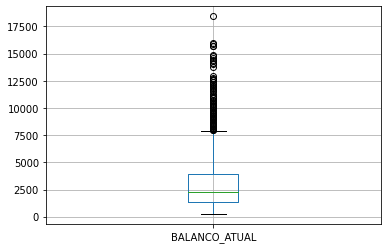

In [19]:
boxplot = base.boxplot(column=['BALANCO_ATUAL'])

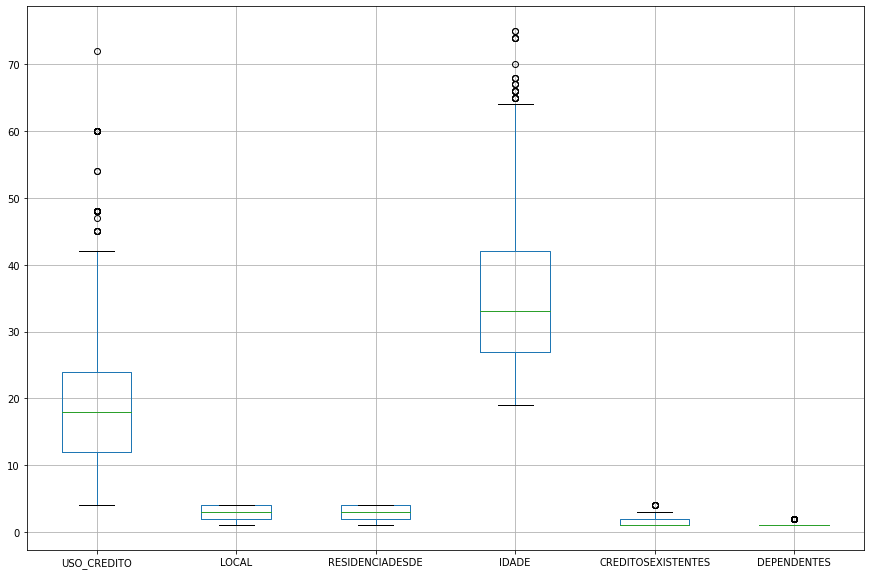

In [20]:
# Boxplot - Visualização de outliers.
boxplot = base.boxplot(column=['USO_CREDITO','LOCAL','RESIDENCIADESDE',
                               'IDADE', 'CREDITOSEXISTENTES', 'DEPENDENTES'],figsize=(15,10))

### Medidas Espalhamento

In [21]:
# Intervalo entre as características máxima e mínina de cada classe.
# Mostra o espalhamento máximo entre os valores.
data_features = base[['BALANCO_ATUAL','USO_CREDITO','LOCAL','RESIDENCIADESDE',
                               'IDADE', 'CREDITOSEXISTENTES', 'DEPENDENTES']]
data_features.max() - data_features.min()

BALANCO_ATUAL         18174
USO_CREDITO              68
LOCAL                     3
RESIDENCIADESDE           3
IDADE                    56
CREDITOSEXISTENTES        3
DEPENDENTES               1
dtype: int64

In [22]:
# Variância - representa a diferença de cada valor do atributo em relação a média.
base.var()

USO_CREDITO           1.454150e+02
BALANCO_ATUAL         7.967843e+06
LOCAL                 1.251523e+00
RESIDENCIADESDE       1.218193e+00
IDADE                 1.294013e+02
CREDITOSEXISTENTES    3.336847e-01
DEPENDENTES           1.311061e-01
dtype: float64

In [23]:
# Desvio padrão - indica o quanto os dados estão afastados da média
# Um valor alto, indica que os dados estão mais espalhados. Um valor baixo, indica que os valores estão mais próximos da média
base.std()

USO_CREDITO             12.058814
BALANCO_ATUAL         2822.736876
LOCAL                    1.118715
RESIDENCIADESDE          1.103718
IDADE                   11.375469
CREDITOSEXISTENTES       0.577654
DEPENDENTES              0.362086
dtype: float64

In [24]:
# São pontos estabelecidos em intervalos regulares a partir da 
# função distribuição acumulada, de uma variável aleatória.

base.quantile()

USO_CREDITO             18.0
BALANCO_ATUAL         2319.5
LOCAL                    3.0
RESIDENCIADESDE          3.0
IDADE                   33.0
CREDITOSEXISTENTES       1.0
DEPENDENTES              1.0
Name: 0.5, dtype: float64

### Medidas de Distribuição 

In [25]:
# Obliquidade - inclinação imparcial sobre o eixo solicitado.
# No caso da obliquidade maior que zero, os dados estão mais a esquerda do histograma. Quando negativo, os dados estão mais a direita.

base.skew()

USO_CREDITO           1.094184
BALANCO_ATUAL         1.949628
LOCAL                -0.531348
RESIDENCIADESDE      -0.272570
IDADE                 1.020739
CREDITOSEXISTENTES    1.272576
DEPENDENTES           1.909445
dtype: float64

In [26]:
# Curtose - achatamento imparcial da curva sobre o eixo solicitado.
# Quando maior que zero, o histograma apresenta uma distribuição mais concentrada e elevada que a normal. Quando negativo, essa distribuição é mais achatada que a distribuição normal.

base.kurtosis()

USO_CREDITO           0.919781
BALANCO_ATUAL         4.292590
LOCAL                -1.210473
RESIDENCIADESDE      -1.381449
IDADE                 0.595780
CREDITOSEXISTENTES    1.604439
DEPENDENTES           1.649274
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfb45b9ad0>,
      dtype=object)

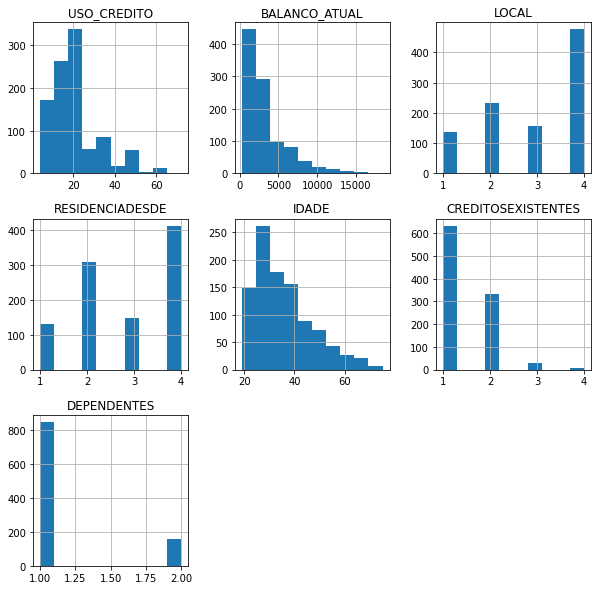

In [27]:
# Visualiação gráfica que agrupa os dados em intervalos.
# Quanto mais próximo de zero, mais próximo da distribuição normal os dados estão.

base.hist(figsize=(10,10))

## Analise de dados multivariados

In [28]:
# Tabela de Correlação
corr_table = base.corr()
corr_table

,USO_CREDITO,BALANCO_ATUAL,LOCAL,RESIDENCIADESDE,IDADE,CREDITOSEXISTENTES,DEPENDENTES
USO_CREDITO,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
BALANCO_ATUAL,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
LOCAL,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
RESIDENCIADESDE,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
IDADE,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
CREDITOSEXISTENTES,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
DEPENDENTES,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


Fazendo matriz de correlação para identificar relação entre os dados

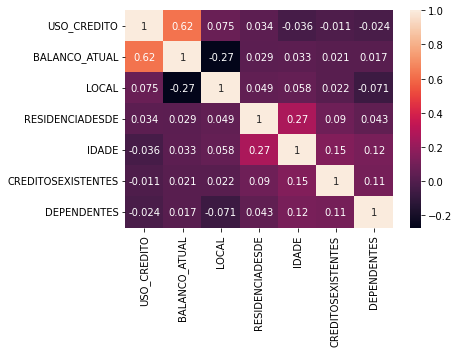

In [29]:
# Heatmap - gráfico para encontrar correlação.
sns.heatmap(corr_table, xticklabels=corr_table.columns, yticklabels=corr_table.columns, annot=True)

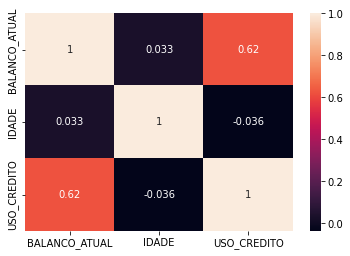

In [30]:
corr = base[['BALANCO_ATUAL','IDADE','USO_CREDITO']].corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True)

In [31]:
# Lista com maior correlação entre os pares.
ordenado = base.corr().unstack().sort_values(ascending = False)
print(ordenado[4:])

IDADE               IDADE                 1.000000
RESIDENCIADESDE     RESIDENCIADESDE       1.000000
USO_CREDITO         USO_CREDITO           1.000000
BALANCO_ATUAL       USO_CREDITO           0.624984
USO_CREDITO         BALANCO_ATUAL         0.624984
RESIDENCIADESDE     IDADE                 0.266419
IDADE               RESIDENCIADESDE       0.266419
                    CREDITOSEXISTENTES    0.149254
CREDITOSEXISTENTES  IDADE                 0.149254
IDADE               DEPENDENTES           0.118201
DEPENDENTES         IDADE                 0.118201
CREDITOSEXISTENTES  DEPENDENTES           0.109667
DEPENDENTES         CREDITOSEXISTENTES    0.109667
RESIDENCIADESDE     CREDITOSEXISTENTES    0.089625
CREDITOSEXISTENTES  RESIDENCIADESDE       0.089625
USO_CREDITO         LOCAL                 0.074749
LOCAL               USO_CREDITO           0.074749
IDADE               LOCAL                 0.058266
LOCAL               IDADE                 0.058266
RESIDENCIADESDE     LOCAL      

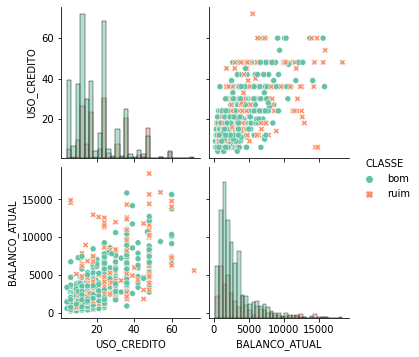

In [32]:
# Correlação positiva - o aumento de um influencia no aumento do outro
sns.pairplot(base[['USO_CREDITO','BALANCO_ATUAL','CLASSE']],hue="CLASSE",kind="scatter",palette="Set2",diag_kind="hist", markers=["o","X"])

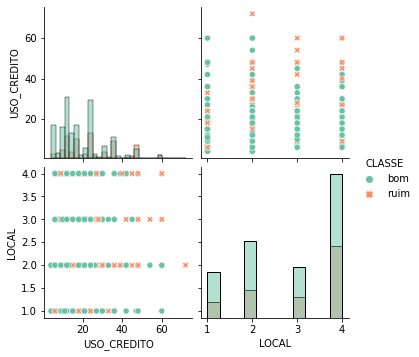

In [33]:
# Correlação negativa - o aumento de um implica na redução de outro

sns.pairplot(base[['USO_CREDITO','LOCAL','CLASSE']],hue="CLASSE",kind="scatter",palette="Set2",diag_kind="hist", markers=["o","X"])

# Preparação dos Dados

In [34]:
base

,CHEQUEESPECIAL,USO_CREDITO,HISTORICO_CREDITO,PROPOSITO,BALANCO_ATUAL,BALANCO_MEDIO_CREDITO,EMPREGADO,LOCAL,ESTADOCIVIL,OUTRASFUNCOES,RESIDENCIADESDE,TIPOSBENS,IDADE,OUTROSPLANOSPGTO,RESIDENCIA,CREDITOSEXISTENTES,EMPREGO,DEPENDENTES,TRABAESTRANGEIRO,CLASSE
0,<0,6,crítica / outros de crédito existente,Computador/TV,1169,nenhuma economia conhecida,>=7,4,masculino solteiro,nenhum,4,bens imóveis,67,nenhum,própria,2,especializado,1,sim,bom
1,0<=X<200,48,existente e pago,Computador/TV,5951,<100,1<=X<4,2,fem div/cas,nenhum,2,bens imóveis,22,nenhum,própria,1,especializado,1,sim,ruim
2,sem cheque,12,crítica / outros de crédito existente,educação,2096,<100,4<=X<7,2,masculino solteiro,nenhum,3,bens imóveis,49,nenhum,própria,1,não especializado,2,sim,bom
3,<0,42,existente e pago,mobilia/equipamento,7882,<100,4<=X<7,2,masculino solteiro,fiador,4,seguro de vida,45,nenhum,gratuitamente,1,especializado,2,sim,bom
4,<0,24,atrasos anteriores,carro novo,4870,<100,1<=X<4,3,masculino solteiro,nenhum,4,nenhuma conhecida,53,nenhum,gratuitamente,2,especializado,2,sim,ruim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,sem cheque,12,existente e pago,mobilia/equipamento,1736,<100,4<=X<7,3,fem div/cas,nenhum,4,bens imóveis,31,nenhum,própria,1,não especializado,1,sim,bom
996,<0,30,existente e pago,carro usado,3857,<100,1<=X<4,4,masculino div/sep,nenhum,4,seguro de vida,40,nenhum,própria,1,alta qualificação/autonomo/Gerente,1,sim,bom
997,sem cheque,12,existente e pago,Computador/TV,804,<100,>=7,4,masculino solteiro,nenhum,4,carro,38,nenhum,própria,1,especializado,1,sim,bom
998,<0,45,existente e pago,Computador/TV,1845,<100,1<=X<4,4,masculino solteiro,nenhum,4,nenhuma conhecida,23,nenhum,gratuitamente,1,especializado,1,sim,ruim


In [35]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CHEQUEESPECIAL         1000 non-null   object
 1   USO_CREDITO            1000 non-null   int64 
 2   HISTORICO_CREDITO      1000 non-null   object
 3   PROPOSITO              1000 non-null   object
 4   BALANCO_ATUAL          1000 non-null   int64 
 5   BALANCO_MEDIO_CREDITO  1000 non-null   object
 6   EMPREGADO              1000 non-null   object
 7   LOCAL                  1000 non-null   int64 
 8   ESTADOCIVIL            1000 non-null   object
 9   OUTRASFUNCOES          1000 non-null   object
 10  RESIDENCIADESDE        1000 non-null   int64 
 11  TIPOSBENS              1000 non-null   object
 12  IDADE                  1000 non-null   int64 
 13  OUTROSPLANOSPGTO       1000 non-null   object
 14  RESIDENCIA             1000 non-null   object
 15  CREDITOSEXISTENTES    

In [36]:
# Transforma a coluna CLASSE em numérica

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Classe
le.fit(base.CLASSE) 
base.CLASSE = le.transform(base.CLASSE)

In [37]:
base.CLASSE

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: CLASSE, Length: 1000, dtype: int64

In [38]:
# Aplicando o get_dummies para transformar as colunas categóricas em numéricas.
# Retirando a coluna CLASSE porque é a resposta.

campos_selecionados = ['CHEQUEESPECIAL','HISTORICO_CREDITO','PROPOSITO',
                       'BALANCO_MEDIO_CREDITO','EMPREGADO','ESTADOCIVIL',
                       'OUTRASFUNCOES','TIPOSBENS','OUTROSPLANOSPGTO',
                       'RESIDENCIA','EMPREGO','TRABAESTRANGEIRO'] 
base_transformation = pd.get_dummies(base, columns=campos_selecionados)
base_transformation

,USO_CREDITO,BALANCO_ATUAL,LOCAL,RESIDENCIADESDE,IDADE,CREDITOSEXISTENTES,DEPENDENTES,CLASSE,CHEQUEESPECIAL_0<=X<200,CHEQUEESPECIAL_<0,CHEQUEESPECIAL_>=200,CHEQUEESPECIAL_sem cheque,HISTORICO_CREDITO_atrasos anteriores,HISTORICO_CREDITO_crítica / outros de crédito existente,HISTORICO_CREDITO_existente e pago,HISTORICO_CREDITO_sem créditos/todos pagos,HISTORICO_CREDITO_todos pagos,PROPOSITO_Computador/TV,PROPOSITO_Eletrodomésticos,PROPOSITO_carro novo,PROPOSITO_carro usado,PROPOSITO_educação,PROPOSITO_mobilia/equipamento,PROPOSITO_negócios,PROPOSITO_obras,PROPOSITO_outros,PROPOSITO_qualificação,BALANCO_MEDIO_CREDITO_100<=X<500,BALANCO_MEDIO_CREDITO_500<=X<1000,BALANCO_MEDIO_CREDITO_<100,BALANCO_MEDIO_CREDITO_>=1000,BALANCO_MEDIO_CREDITO_nenhuma economia conhecida,EMPREGADO_1<=X<4,EMPREGADO_4<=X<7,EMPREGADO_<1,EMPREGADO_>=7,EMPREGADO_desempregado,ESTADOCIVIL_fem div/cas,ESTADOCIVIL_masculino casado/viuvo,ESTADOCIVIL_masculino div/sep,ESTADOCIVIL_masculino solteiro,OUTRASFUNCOES_co requerente,OUTRASFUNCOES_fiador,OUTRASFUNCOES_nenhum,TIPOSBENS_bens imóveis,TIPOSBENS_carro,TIPOSBENS_nenhuma conhecida,TIPOSBENS_seguro de vida,OUTROSPLANOSPGTO_banco,OUTROSPLANOSPGTO_nenhum,OUTROSPLANOSPGTO_stores,RESIDENCIA_alugada,RESIDENCIA_gratuitamente,RESIDENCIA_própria,EMPREGO_alta qualificação/autonomo/Gerente,EMPREGO_especializado,EMPREGO_não especializado,EMPREGO_unemp/unespecializado non res,TRABAESTRANGEIRO_não,TRABAESTRANGEIRO_sim
0,6,1169,4,4,67,2,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1
1,48,5951,2,2,22,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1
2,12,2096,2,3,49,1,2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
3,42,7882,2,4,45,1,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1
4,24,4870,3,4,53,2,2,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
996,30,3857,4,4,40,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1
997,12,804,4,4,38,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1
998,45,1845,4,4,23,1,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1


In [39]:
base_transformation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                                                   Non-Null Count  Dtype
---  ------                                                   --------------  -----
 0   USO_CREDITO                                              1000 non-null   int64
 1   BALANCO_ATUAL                                            1000 non-null   int64
 2   LOCAL                                                    1000 non-null   int64
 3   RESIDENCIADESDE                                          1000 non-null   int64
 4   IDADE                                                    1000 non-null   int64
 5   CREDITOSEXISTENTES                                       1000 non-null   int64
 6   DEPENDENTES                                              1000 non-null   int64
 7   CLASSE                                                   1000 non-null   int64
 8   CHEQUEESPECIAL_0<=X<200                          

# Amostragem dos Dados

## Amostragem Aleatória Simples
Um determinado número de elementos é retirado da população de forma aleatória, onde todos os elementos têm a mesma probabilidade de serem selecionados para a amostra.

In [40]:
# Selecionando o número de registros de uma amostra:

df_sample = base_transformation.sample(n=10)

In [41]:
base_transformation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                                                   Non-Null Count  Dtype
---  ------                                                   --------------  -----
 0   USO_CREDITO                                              1000 non-null   int64
 1   BALANCO_ATUAL                                            1000 non-null   int64
 2   LOCAL                                                    1000 non-null   int64
 3   RESIDENCIADESDE                                          1000 non-null   int64
 4   IDADE                                                    1000 non-null   int64
 5   CREDITOSEXISTENTES                                       1000 non-null   int64
 6   DEPENDENTES                                              1000 non-null   int64
 7   CLASSE                                                   1000 non-null   int64
 8   CHEQUEESPECIAL_0<=X<200                          

In [42]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 225 to 647
Data columns (total 60 columns):
 #   Column                                                   Non-Null Count  Dtype
---  ------                                                   --------------  -----
 0   USO_CREDITO                                              10 non-null     int64
 1   BALANCO_ATUAL                                            10 non-null     int64
 2   LOCAL                                                    10 non-null     int64
 3   RESIDENCIADESDE                                          10 non-null     int64
 4   IDADE                                                    10 non-null     int64
 5   CREDITOSEXISTENTES                                       10 non-null     int64
 6   DEPENDENTES                                              10 non-null     int64
 7   CLASSE                                                   10 non-null     int64
 8   CHEQUEESPECIAL_0<=X<200                          

In [43]:
# Selecionando uma amostra aleatória de 10%:

df_sample = base_transformation.sample(frac=0.10)

In [44]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 241 to 621
Data columns (total 60 columns):
 #   Column                                                   Non-Null Count  Dtype
---  ------                                                   --------------  -----
 0   USO_CREDITO                                              100 non-null    int64
 1   BALANCO_ATUAL                                            100 non-null    int64
 2   LOCAL                                                    100 non-null    int64
 3   RESIDENCIADESDE                                          100 non-null    int64
 4   IDADE                                                    100 non-null    int64
 5   CREDITOSEXISTENTES                                       100 non-null    int64
 6   DEPENDENTES                                              100 non-null    int64
 7   CLASSE                                                   100 non-null    int64
 8   CHEQUEESPECIAL_0<=X<200                         

## Amostragem Estratificada
Essa amostragem consiste em dividir toda a população em diferentes grupos ou estratos diferentes, de maneira que um indivíduo só pode fazer parte de um único grupo e nenhum desses indivíduos pode ficar de fora de um estrato, a seleção de cada um dos indivíduos é feita de forma aleatória.

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
base_transformation['CLASSE'].value_counts()

0    700
1    300
Name: CLASSE, dtype: int64

In [47]:
# Gerando a amostra de teste estratificada:

X_train, X_test, y_train, y_test = train_test_split(base_transformation.drop('CLASSE',axis=1),
base_transformation['CLASSE'], stratify=base_transformation['CLASSE'], test_size=0.20)

In [48]:
y_test.shape

(200,)

In [49]:
y_test.value_counts()

0    140
1     60
Name: CLASSE, dtype: int64

####Amostragem Sistemática
Os elementos da população são colocados em uma lista e cada enésimo elemento da lista é escolhido (sistematicamente) por inclusão na amostra.

In [50]:
# Selecionado um registro aleatório entre os valores de 0 a 10:
semente = np.random.choice(10, 1)
semente

array([9])

In [51]:
# Gerando um array que inicia em 0 e termina em 100 com um intervalo de 3:
indices = np.arange(0,100,semente)
indices

array([ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81, 90, 99])

In [52]:
amostra = base_transformation.loc[indices,:]
amostra

,USO_CREDITO,BALANCO_ATUAL,LOCAL,RESIDENCIADESDE,IDADE,CREDITOSEXISTENTES,DEPENDENTES,CLASSE,CHEQUEESPECIAL_0<=X<200,CHEQUEESPECIAL_<0,CHEQUEESPECIAL_>=200,CHEQUEESPECIAL_sem cheque,HISTORICO_CREDITO_atrasos anteriores,HISTORICO_CREDITO_crítica / outros de crédito existente,HISTORICO_CREDITO_existente e pago,HISTORICO_CREDITO_sem créditos/todos pagos,HISTORICO_CREDITO_todos pagos,PROPOSITO_Computador/TV,PROPOSITO_Eletrodomésticos,PROPOSITO_carro novo,PROPOSITO_carro usado,PROPOSITO_educação,PROPOSITO_mobilia/equipamento,PROPOSITO_negócios,PROPOSITO_obras,PROPOSITO_outros,PROPOSITO_qualificação,BALANCO_MEDIO_CREDITO_100<=X<500,BALANCO_MEDIO_CREDITO_500<=X<1000,BALANCO_MEDIO_CREDITO_<100,BALANCO_MEDIO_CREDITO_>=1000,BALANCO_MEDIO_CREDITO_nenhuma economia conhecida,EMPREGADO_1<=X<4,EMPREGADO_4<=X<7,EMPREGADO_<1,EMPREGADO_>=7,EMPREGADO_desempregado,ESTADOCIVIL_fem div/cas,ESTADOCIVIL_masculino casado/viuvo,ESTADOCIVIL_masculino div/sep,ESTADOCIVIL_masculino solteiro,OUTRASFUNCOES_co requerente,OUTRASFUNCOES_fiador,OUTRASFUNCOES_nenhum,TIPOSBENS_bens imóveis,TIPOSBENS_carro,TIPOSBENS_nenhuma conhecida,TIPOSBENS_seguro de vida,OUTROSPLANOSPGTO_banco,OUTROSPLANOSPGTO_nenhum,OUTROSPLANOSPGTO_stores,RESIDENCIA_alugada,RESIDENCIA_gratuitamente,RESIDENCIA_própria,EMPREGO_alta qualificação/autonomo/Gerente,EMPREGO_especializado,EMPREGO_não especializado,EMPREGO_unemp/unespecializado non res,TRABAESTRANGEIRO_não,TRABAESTRANGEIRO_sim
0,6,1169,4,4,67,2,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1
9,30,5234,4,2,28,2,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1
18,24,12579,4,2,44,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
27,12,409,3,3,42,2,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1
36,48,6110,1,3,31,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1
45,11,1393,4,4,35,2,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1
54,36,2225,4,4,57,2,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1
63,48,14421,2,2,25,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1
72,8,1164,3,4,51,2,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1
81,15,1213,4,3,47,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [53]:
amostra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 99
Data columns (total 60 columns):
 #   Column                                                   Non-Null Count  Dtype
---  ------                                                   --------------  -----
 0   USO_CREDITO                                              12 non-null     int64
 1   BALANCO_ATUAL                                            12 non-null     int64
 2   LOCAL                                                    12 non-null     int64
 3   RESIDENCIADESDE                                          12 non-null     int64
 4   IDADE                                                    12 non-null     int64
 5   CREDITOSEXISTENTES                                       12 non-null     int64
 6   DEPENDENTES                                              12 non-null     int64
 7   CLASSE                                                   12 non-null     int64
 8   CHEQUEESPECIAL_0<=X<200                             

In [54]:
amostra.shape

(12, 60)

##Normalização dos Dados
Transforma dados discrepantes em dados mais sutis

In [55]:
base_transformation

,USO_CREDITO,BALANCO_ATUAL,LOCAL,RESIDENCIADESDE,IDADE,CREDITOSEXISTENTES,DEPENDENTES,CLASSE,CHEQUEESPECIAL_0<=X<200,CHEQUEESPECIAL_<0,CHEQUEESPECIAL_>=200,CHEQUEESPECIAL_sem cheque,HISTORICO_CREDITO_atrasos anteriores,HISTORICO_CREDITO_crítica / outros de crédito existente,HISTORICO_CREDITO_existente e pago,HISTORICO_CREDITO_sem créditos/todos pagos,HISTORICO_CREDITO_todos pagos,PROPOSITO_Computador/TV,PROPOSITO_Eletrodomésticos,PROPOSITO_carro novo,PROPOSITO_carro usado,PROPOSITO_educação,PROPOSITO_mobilia/equipamento,PROPOSITO_negócios,PROPOSITO_obras,PROPOSITO_outros,PROPOSITO_qualificação,BALANCO_MEDIO_CREDITO_100<=X<500,BALANCO_MEDIO_CREDITO_500<=X<1000,BALANCO_MEDIO_CREDITO_<100,BALANCO_MEDIO_CREDITO_>=1000,BALANCO_MEDIO_CREDITO_nenhuma economia conhecida,EMPREGADO_1<=X<4,EMPREGADO_4<=X<7,EMPREGADO_<1,EMPREGADO_>=7,EMPREGADO_desempregado,ESTADOCIVIL_fem div/cas,ESTADOCIVIL_masculino casado/viuvo,ESTADOCIVIL_masculino div/sep,ESTADOCIVIL_masculino solteiro,OUTRASFUNCOES_co requerente,OUTRASFUNCOES_fiador,OUTRASFUNCOES_nenhum,TIPOSBENS_bens imóveis,TIPOSBENS_carro,TIPOSBENS_nenhuma conhecida,TIPOSBENS_seguro de vida,OUTROSPLANOSPGTO_banco,OUTROSPLANOSPGTO_nenhum,OUTROSPLANOSPGTO_stores,RESIDENCIA_alugada,RESIDENCIA_gratuitamente,RESIDENCIA_própria,EMPREGO_alta qualificação/autonomo/Gerente,EMPREGO_especializado,EMPREGO_não especializado,EMPREGO_unemp/unespecializado non res,TRABAESTRANGEIRO_não,TRABAESTRANGEIRO_sim
0,6,1169,4,4,67,2,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1
1,48,5951,2,2,22,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1
2,12,2096,2,3,49,1,2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
3,42,7882,2,4,45,1,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1
4,24,4870,3,4,53,2,2,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
996,30,3857,4,4,40,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1
997,12,804,4,4,38,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1
998,45,1845,4,4,23,1,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1


In [56]:
# Desvio padrão elevado em BALANCO_ATUAL, USO_CREDITO e IDADE, portanto confirma a presença de outliers.

base_transformation.std()

USO_CREDITO                                                  12.058814
BALANCO_ATUAL                                              2822.736876
LOCAL                                                         1.118715
RESIDENCIADESDE                                               1.103718
IDADE                                                        11.375469
CREDITOSEXISTENTES                                            0.577654
DEPENDENTES                                                   0.362086
CLASSE                                                        0.458487
CHEQUEESPECIAL_0<=X<200                                       0.443662
CHEQUEESPECIAL_<0                                             0.446232
CHEQUEESPECIAL_>=200                                          0.243085
CHEQUEESPECIAL_sem cheque                                     0.488879
HISTORICO_CREDITO_atrasos anteriores                          0.283437
HISTORICO_CREDITO_crítica / outros de crédito existente       0.455366
HISTOR

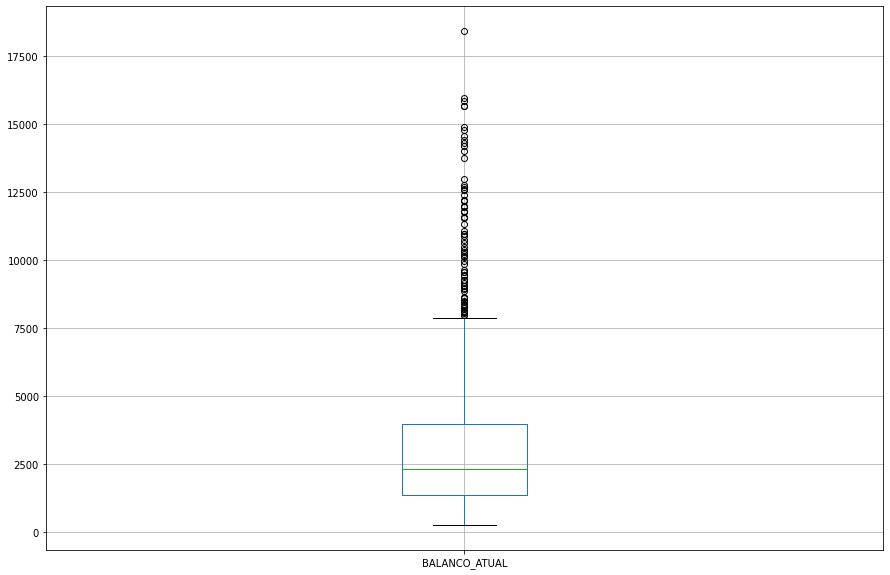

In [57]:
# Boxplot - Visualização de outliers.
# Desvio padrão acima do normal por isso precisa ser normalizado
boxplot = base_transformation[['BALANCO_ATUAL']].boxplot(figsize=(15,10))

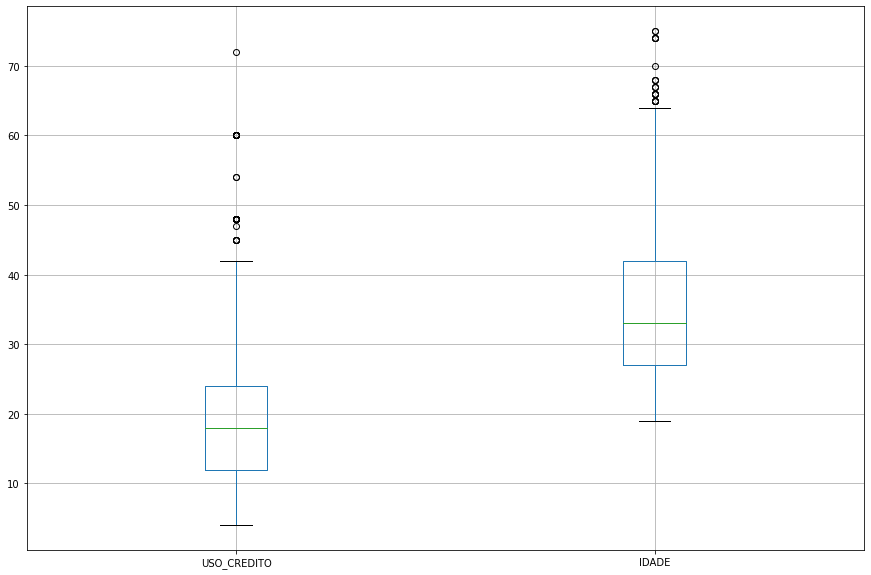

In [58]:
# Boxplot - Visualização de outliers.
# Desvio padrão acima do normal por isso precisa ser normalizado
boxplot = base_transformation[['USO_CREDITO', 'IDADE']].boxplot(figsize=(15,10))

In [59]:
# Normalização dos dados entre 0 e 1.

min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(base_transformation)

scaled_array

array([[0.02941176, 0.05056674, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.64705882, 0.31368989, 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       [0.11764706, 0.10157368, 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.11764706, 0.03048311, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.60294118, 0.08776274, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.60294118, 0.23803235, 0.66666667, ..., 0.        , 0.        ,
        1.        ]])

In [60]:
base_transformation.columns

Index(['USO_CREDITO', 'BALANCO_ATUAL', 'LOCAL', 'RESIDENCIADESDE', 'IDADE',
       'CREDITOSEXISTENTES', 'DEPENDENTES', 'CLASSE',
       'CHEQUEESPECIAL_0<=X<200', 'CHEQUEESPECIAL_<0', 'CHEQUEESPECIAL_>=200',
       'CHEQUEESPECIAL_sem cheque', 'HISTORICO_CREDITO_atrasos anteriores',
       'HISTORICO_CREDITO_crítica / outros de crédito existente',
       'HISTORICO_CREDITO_existente e pago',
       'HISTORICO_CREDITO_sem créditos/todos pagos',
       'HISTORICO_CREDITO_todos pagos', 'PROPOSITO_Computador/TV',
       'PROPOSITO_Eletrodomésticos', 'PROPOSITO_carro novo',
       'PROPOSITO_carro usado', 'PROPOSITO_educação',
       'PROPOSITO_mobilia/equipamento', 'PROPOSITO_negócios',
       'PROPOSITO_obras', 'PROPOSITO_outros', 'PROPOSITO_qualificação',
       'BALANCO_MEDIO_CREDITO_100<=X<500', 'BALANCO_MEDIO_CREDITO_500<=X<1000',
       'BALANCO_MEDIO_CREDITO_<100', 'BALANCO_MEDIO_CREDITO_>=1000',
       'BALANCO_MEDIO_CREDITO_nenhuma economia conhecida', 'EMPREGADO_1<=X<4',
       

In [61]:
df_principal_norm = pd.DataFrame(
    scaled_array, index=base_transformation.index, 
    columns=['USO_CREDITO', 'BALANCO_ATUAL', 'LOCAL', 'RESIDENCIADESDE', 'IDADE',
       'CREDITOSEXISTENTES', 'DEPENDENTES', 'CLASSE',
       'CHEQUEESPECIAL_0<=X<200', 'CHEQUEESPECIAL_<0', 'CHEQUEESPECIAL_>=200',
       'CHEQUEESPECIAL_sem cheque', 'HISTORICO_CREDITO_atrasos anteriores',
       'HISTORICO_CREDITO_crítica / outros de crédito existente',
       'HISTORICO_CREDITO_existente e pago',
       'HISTORICO_CREDITO_sem créditos/todos pagos',
       'HISTORICO_CREDITO_todos pagos', 'PROPOSITO_Computador/TV',
       'PROPOSITO_Eletrodomésticos', 'PROPOSITO_carro novo',
       'PROPOSITO_carro usado', 'PROPOSITO_educação',
       'PROPOSITO_mobilia/equipamento', 'PROPOSITO_negócios',
       'PROPOSITO_obras', 'PROPOSITO_outros', 'PROPOSITO_qualificação',
       'BALANCO_MEDIO_CREDITO_100<=X<500', 'BALANCO_MEDIO_CREDITO_500<=X<1000',
       'BALANCO_MEDIO_CREDITO_<100', 'BALANCO_MEDIO_CREDITO_>=1000',
       'BALANCO_MEDIO_CREDITO_nenhuma economia conhecida', 'EMPREGADO_1<=X<4',
       'EMPREGADO_4<=X<7', 'EMPREGADO_<1', 'EMPREGADO_>=7',
       'EMPREGADO_desempregado', 'ESTADOCIVIL_fem div/cas',
       'ESTADOCIVIL_masculino casado/viuvo', 'ESTADOCIVIL_masculino div/sep',
       'ESTADOCIVIL_masculino solteiro', 'OUTRASFUNCOES_co requerente',
       'OUTRASFUNCOES_fiador', 'OUTRASFUNCOES_nenhum',
       'TIPOSBENS_bens imóveis', 'TIPOSBENS_carro',
       'TIPOSBENS_nenhuma conhecida', 'TIPOSBENS_seguro de vida',
       'OUTROSPLANOSPGTO_banco', 'OUTROSPLANOSPGTO_nenhum',
       'OUTROSPLANOSPGTO_stores', 'RESIDENCIA_alugada',
       'RESIDENCIA_gratuitamente', 'RESIDENCIA_própria',
       'EMPREGO_alta qualificação/autonomo/Gerente', 'EMPREGO_especializado',
       'EMPREGO_não especializado', 'EMPREGO_unemp/unespecializado non res',
       'TRABAESTRANGEIRO_não', 'TRABAESTRANGEIRO_sim'])
df_principal_norm

,USO_CREDITO,BALANCO_ATUAL,LOCAL,RESIDENCIADESDE,IDADE,CREDITOSEXISTENTES,DEPENDENTES,CLASSE,CHEQUEESPECIAL_0<=X<200,CHEQUEESPECIAL_<0,CHEQUEESPECIAL_>=200,CHEQUEESPECIAL_sem cheque,HISTORICO_CREDITO_atrasos anteriores,HISTORICO_CREDITO_crítica / outros de crédito existente,HISTORICO_CREDITO_existente e pago,HISTORICO_CREDITO_sem créditos/todos pagos,HISTORICO_CREDITO_todos pagos,PROPOSITO_Computador/TV,PROPOSITO_Eletrodomésticos,PROPOSITO_carro novo,PROPOSITO_carro usado,PROPOSITO_educação,PROPOSITO_mobilia/equipamento,PROPOSITO_negócios,PROPOSITO_obras,PROPOSITO_outros,PROPOSITO_qualificação,BALANCO_MEDIO_CREDITO_100<=X<500,BALANCO_MEDIO_CREDITO_500<=X<1000,BALANCO_MEDIO_CREDITO_<100,BALANCO_MEDIO_CREDITO_>=1000,BALANCO_MEDIO_CREDITO_nenhuma economia conhecida,EMPREGADO_1<=X<4,EMPREGADO_4<=X<7,EMPREGADO_<1,EMPREGADO_>=7,EMPREGADO_desempregado,ESTADOCIVIL_fem div/cas,ESTADOCIVIL_masculino casado/viuvo,ESTADOCIVIL_masculino div/sep,ESTADOCIVIL_masculino solteiro,OUTRASFUNCOES_co requerente,OUTRASFUNCOES_fiador,OUTRASFUNCOES_nenhum,TIPOSBENS_bens imóveis,TIPOSBENS_carro,TIPOSBENS_nenhuma conhecida,TIPOSBENS_seguro de vida,OUTROSPLANOSPGTO_banco,OUTROSPLANOSPGTO_nenhum,OUTROSPLANOSPGTO_stores,RESIDENCIA_alugada,RESIDENCIA_gratuitamente,RESIDENCIA_própria,EMPREGO_alta qualificação/autonomo/Gerente,EMPREGO_especializado,EMPREGO_não especializado,EMPREGO_unemp/unespecializado non res,TRABAESTRANGEIRO_não,TRABAESTRANGEIRO_sim
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.117647,0.081765,0.666667,1.000000,0.214286,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
996,0.382353,0.198470,1.000000,1.000000,0.375000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
997,0.117647,0.030483,1.000000,1.000000,0.339286,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
998,0.602941,0.087763,1.000000,1.000000,0.071429,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [62]:
# Verificando o desvio padrão - BALANCO_ATUAL normalizado

df_principal_norm.std()

USO_CREDITO                                                0.177336
BALANCO_ATUAL                                              0.155317
LOCAL                                                      0.372905
RESIDENCIADESDE                                            0.367906
IDADE                                                      0.203133
CREDITOSEXISTENTES                                         0.192551
DEPENDENTES                                                0.362086
CLASSE                                                     0.458487
CHEQUEESPECIAL_0<=X<200                                    0.443662
CHEQUEESPECIAL_<0                                          0.446232
CHEQUEESPECIAL_>=200                                       0.243085
CHEQUEESPECIAL_sem cheque                                  0.488879
HISTORICO_CREDITO_atrasos anteriores                       0.283437
HISTORICO_CREDITO_crítica / outros de crédito existente    0.455366
HISTORICO_CREDITO_existente e pago              

In [63]:
# Verificando a variância

df_principal_norm.var()

USO_CREDITO                                                0.031448
BALANCO_ATUAL                                              0.024123
LOCAL                                                      0.139058
RESIDENCIADESDE                                            0.135355
IDADE                                                      0.041263
CREDITOSEXISTENTES                                         0.037076
DEPENDENTES                                                0.131106
CLASSE                                                     0.210210
CHEQUEESPECIAL_0<=X<200                                    0.196836
CHEQUEESPECIAL_<0                                          0.199123
CHEQUEESPECIAL_>=200                                       0.059090
CHEQUEESPECIAL_sem cheque                                  0.239003
HISTORICO_CREDITO_atrasos anteriores                       0.080336
HISTORICO_CREDITO_crítica / outros de crédito existente    0.207358
HISTORICO_CREDITO_existente e pago              

# Modelos de Machine Learning

In [64]:
from sklearn.model_selection import train_test_split

# Separando colunas e classe
X = df_principal_norm.drop(columns=['CLASSE'])
Y = df_principal_norm[['CLASSE']]

# Dividindo a base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=84)

In [65]:
## Dicionário para cálculo das métricas
scoring =  {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
           'f1' : 'f1'}

## RandomForestClassifier

### GridSearchCV

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state = 84)

param_grid = {'n_estimators' : [100,500]
              ,'max_leaf_nodes' : [10,50],
              'max_depth' : [100,500]}

grid_rfc = GridSearchCV(rfc, param_grid, cv=10, iid=False, 
                        n_jobs=-1, refit='accuracy')

grid_rfc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=84,
                                 

In [67]:
grid_rfc.best_params_

{'max_depth': 100, 'max_leaf_nodes': 50, 'n_estimators': 500}

In [68]:
grid_rfc.best_score_

0.7671428571428571

### cross_validate

In [69]:
from sklearn.model_selection import cross_validate

validate_result_grid_rfc = cross_validate(grid_rfc, X_test, y_test, scoring=scoring, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/dist-packag

In [70]:
#Média dos resultados

print("Acurácia: %f" % validate_result_grid_rfc['test_accuracy'].mean())
print("Precisão: %f" % validate_result_grid_rfc['test_precision'].mean())
print("Revocação: %f" % validate_result_grid_rfc['test_recall'].mean())
print("F1: %f" % validate_result_grid_rfc['test_f1'].mean())
print("Tempo de treinamento: %f" % validate_result_grid_rfc['fit_time'].mean())
print("Tempo de classificação: %f" % validate_result_grid_rfc['score_time'].mean())

Acurácia: 0.736667
Precisão: 0.551667
Revocação: 0.165278
F1: 0.245375
Tempo de treinamento: 23.334300
Tempo de classificação: 0.028671


### 30 amostras das métricas: Acurácia, F1, Recall, Precisão, tempo de treinamento e tempo de classificação;

In [71]:
from sklearn.model_selection import cross_validate

validate_result_grid_rfc_30 = cross_validate(grid_rfc, X_test, y_test, scoring=scoring, cv=30)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/di

In [72]:
# 30 amostras das métricas.

print("Acurácia:\n" ,validate_result_grid_rfc_30['test_accuracy'])
print("Precisão:\n",  validate_result_grid_rfc_30['test_precision'])
print("Revocação:\n",  validate_result_grid_rfc_30['test_recall'])
print("F1:\n",  validate_result_grid_rfc_30['test_f1'])
print("Tempo de treinamento:\n", validate_result_grid_rfc_30['fit_time'])
print("Tempo de classificação:\n",  validate_result_grid_rfc_30['score_time'])

Acurácia:
 [0.7 0.6 0.7 0.7 0.7 0.7 0.6 0.8 0.8 0.7 0.7 0.7 0.7 0.7 0.8 0.7 0.7 0.8
 0.8 0.9 0.7 0.7 0.8 0.6 0.7 0.8 0.8 0.7 0.8 0.8]
Precisão:
 [0.         0.         0.         0.         0.         0.
 0.         0.66666667 1.         0.         0.         0.
 0.         0.         0.66666667 0.         0.         1.
 1.         1.         0.         0.         1.         0.
 0.         0.         0.         0.         0.         0.        ]
Revocação:
 [0.         0.         0.         0.         0.         0.
 0.         0.66666667 0.33333333 0.         0.         0.
 0.         0.         0.66666667 0.         0.         0.33333333
 0.33333333 0.66666667 0.         0.         0.33333333 0.
 0.         0.         0.         0.         0.         0.        ]
F1:
 [0.         0.         0.         0.         0.         0.
 0.         0.66666667 0.5        0.         0.         0.
 0.         0.         0.66666667 0.         0.         0.5
 0.5        0.8        0.         0.        

In [73]:
# Média das 30 amostras das métricas.

print("Acurácia: %f" % validate_result_grid_rfc_30['test_accuracy'].mean())
print("Precisão: %f" % validate_result_grid_rfc_30['test_precision'].mean())
print("Revocação: %f" % validate_result_grid_rfc_30['test_recall'].mean())
print("F1: %f" % validate_result_grid_rfc_30['test_f1'].mean())
print("Tempo de treinamento: %f" % validate_result_grid_rfc_30['fit_time'].mean())
print("Tempo de classificação: %f" % validate_result_grid_rfc_30['score_time'].mean())

Acurácia: 0.730000
Precisão: 0.211111
Revocação: 0.111111
F1: 0.137778
Tempo de treinamento: 23.343393
Tempo de classificação: 0.027010


## LinearSVC

### GridSearchCV

In [74]:
from sklearn.svm import LinearSVC

# RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

lsvc = LinearSVC(random_state = 84)

param_grid = {'penalty' : ['l1', 'l2'],
              'C' : [0.01, 0.1, 1, 10, 100]}

grid_lsvc = GridSearchCV(lsvc, param_grid, cv=10, iid=False, 
                        n_jobs=-1, refit='accuracy')

grid_lsvc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=10, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=84, tol=0.0001, verbose=0),
             iid=False, n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit='accuracy',
             return_train_score=False, scoring=None, verbose=0)

In [75]:
grid_lsvc.best_params_

{'C': 1, 'penalty': 'l2'}

### cross_validate

In [76]:
from sklearn.model_selection import cross_validate

validate_result_grid_lsvc = cross_validate(grid_lsvc, X_test, y_test, scoring=scoring, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d ar

In [77]:
#Média dos resultados

print("Acurácia: %f" % validate_result_grid_lsvc['test_accuracy'].mean())
print("Precisão: %f" % validate_result_grid_lsvc['test_precision'].mean())
print("Revocação: %f" % validate_result_grid_lsvc['test_recall'].mean())
print("F1: %f" % validate_result_grid_lsvc['test_f1'].mean())
print("Tempo de treinamento: %f" % validate_result_grid_lsvc['fit_time'].mean())
print("Tempo de classificação: %f" % validate_result_grid_lsvc['score_time'].mean())

Acurácia: 0.746667
Precisão: 0.595833
Revocação: 0.379167
F1: 0.443237
Tempo de treinamento: 0.505546
Tempo de classificação: 0.003535


### 30 amostras das métricas: Acurácia, F1, Recall, Precisão, tempo de treinamento e tempo de classificação;

In [78]:
from sklearn.model_selection import cross_validate

validate_result_grid_lsvc_30 = cross_validate(grid_lsvc, X_test, y_test, scoring=scoring, cv=30)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/

In [79]:
# 30 amostras das métricas.

print("Acurácia:\n" ,validate_result_grid_lsvc_30['test_accuracy'])
print("Precisão:\n",  validate_result_grid_lsvc_30['test_precision'])
print("Revocação:\n",  validate_result_grid_lsvc_30['test_recall'])
print("F1:\n",  validate_result_grid_lsvc_30['test_f1'])
print("Tempo de treinamento:\n", validate_result_grid_lsvc_30['fit_time'])
print("Tempo de classificação:\n",  validate_result_grid_lsvc_30['score_time'])

Acurácia:
 [0.7 0.4 0.7 0.8 0.6 0.9 0.6 0.7 0.9 0.7 0.8 0.8 0.6 0.9 0.9 0.9 0.8 0.8
 0.7 0.7 0.7 0.7 0.8 0.8 0.7 0.6 0.6 0.6 0.9 0.7]
Precisão:
 [0.         0.2        0.5        0.66666667 0.         0.75
 0.33333333 0.5        0.75       0.         1.         1.
 0.         1.         0.75       1.         1.         1.
 0.5        0.5        0.         0.         1.         0.66666667
 0.33333333 0.         0.         0.25       1.         0.        ]
Revocação:
 [0.         0.33333333 0.33333333 0.66666667 0.         1.
 0.33333333 0.33333333 1.         0.         0.33333333 0.33333333
 0.         0.66666667 1.         0.66666667 0.33333333 0.33333333
 0.33333333 0.66666667 0.         0.         0.33333333 0.66666667
 0.5        0.         0.         0.5        0.5        0.        ]
F1:
 [0.         0.25       0.4        0.66666667 0.         0.85714286
 0.33333333 0.4        0.85714286 0.         0.5        0.5
 0.         0.8        0.85714286 0.8        0.5        0.5
 0.4     

In [80]:
# Média das 30 amostras das métricas.

print("Acurácia: %f" % validate_result_grid_lsvc_30['test_accuracy'].mean())
print("Precisão: %f" % validate_result_grid_lsvc_30['test_precision'].mean())
print("Revocação: %f" % validate_result_grid_lsvc_30['test_recall'].mean())
print("F1: %f" % validate_result_grid_lsvc_30['test_f1'].mean())
print("Tempo de treinamento: %f" % validate_result_grid_lsvc_30['fit_time'].mean())
print("Tempo de classificação: %f" % validate_result_grid_lsvc_30['score_time'].mean())

Acurácia: 0.733333
Precisão: 0.490000
Revocação: 0.372222
F1: 0.391984
Tempo de treinamento: 0.522875
Tempo de classificação: 0.004005


#### StratifiedKFold

In [81]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

validate_result_grid_lsvc_strat = cross_validate(grid_lsvc, X_test, y_test, scoring=scoring, cv=StratifiedKFold(30, shuffle=True, random_state=0))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:82

In [82]:
# Média das 30 amostras das métricas estratificadas.

print("Acurácia: %f" % validate_result_grid_lsvc_strat['test_accuracy'].mean())
print("Precisão: %f" % validate_result_grid_lsvc_strat['test_precision'].mean())
print("Revocação: %f" % validate_result_grid_lsvc_strat['test_recall'].mean())
print("F1: %f" % validate_result_grid_lsvc_strat['test_f1'].mean())
print("Tempo de treinamento: %f" % validate_result_grid_lsvc_strat['fit_time'].mean())
print("Tempo de classificação: %f" % validate_result_grid_lsvc_strat['score_time'].mean())

Acurácia: 0.753333
Precisão: 0.516667
Revocação: 0.438889
F1: 0.440794
Tempo de treinamento: 0.515005
Tempo de classificação: 0.003761


#### ShuffleSplit

In [83]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

validate_result_grid_lsvc_shuffle = cross_validate(grid_lsvc, X_test, y_test, scoring=scoring, cv=ShuffleSplit(30, random_state=0))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: Convergence

In [84]:
# Média das 30 amostras das métricas estratificadas.

print("Acurácia: %f" % validate_result_grid_lsvc_shuffle['test_accuracy'].mean())
print("Precisão: %f" % validate_result_grid_lsvc_shuffle['test_precision'].mean())
print("Revocação: %f" % validate_result_grid_lsvc_shuffle['test_recall'].mean())
print("F1: %f" % validate_result_grid_lsvc_shuffle['test_f1'].mean())
print("Tempo de treinamento: %f" % validate_result_grid_lsvc_shuffle['fit_time'].mean())
print("Tempo de classificação: %f" % validate_result_grid_lsvc_shuffle['score_time'].mean())

Acurácia: 0.740000
Precisão: 0.553949
Revocação: 0.385448
F1: 0.412134
Tempo de treinamento: 0.497610
Tempo de classificação: 0.003716
